In [9]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 

# estbalish csv path
survey_data_path = '../resources/survey-data.csv'

# read csv in as a pandas data frame
survey_data_df = pd.read_csv(survey_data_path)

# check if csv was read in correctly
survey_data_df.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,IL,NaN,No,Yes,Often,25-Feb,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,NaN,No,No,Rarely,25-Feb,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


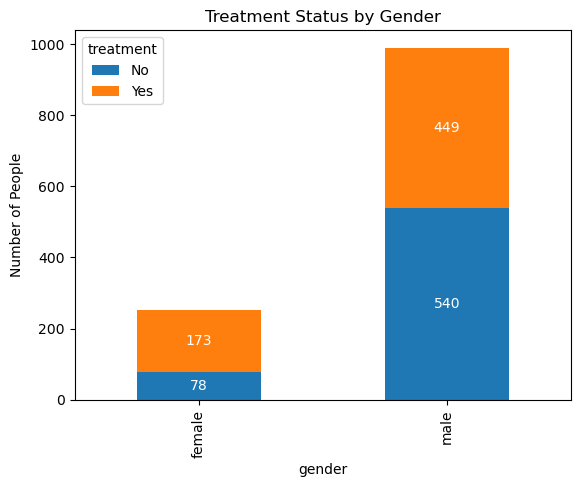

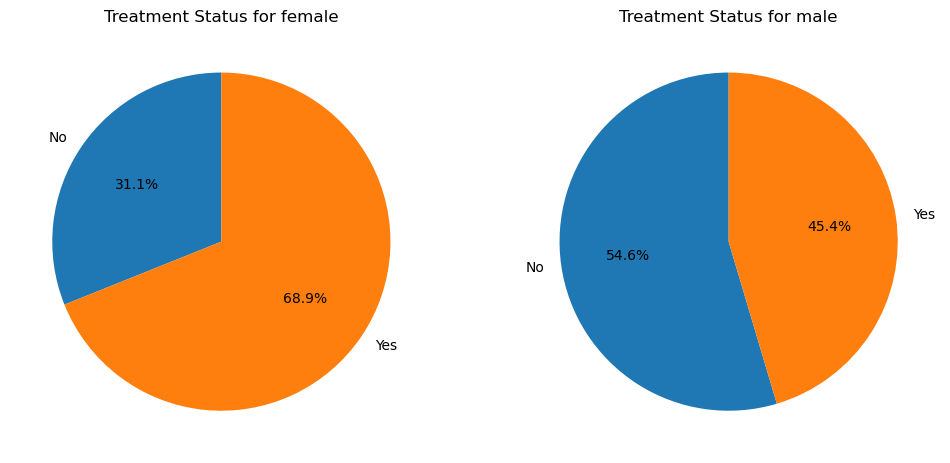

Chi-square value: 43.38082643958715
P-value: 4.5058162382400003e-11


In [10]:
# groupby 'gender' and 'treatment', and count occurrences
gender_treatment_counts = survey_data_df.groupby(['gender', 'treatment']).size().unstack().fillna(0)

# plot bar chart
ax = gender_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Gender')

# add annotations to bars within the bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

# plot pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, gender in enumerate(gender_treatment_counts.index):
    gender_data = gender_treatment_counts.loc[gender]
    axes[i].pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Treatment Status for {gender}')

# show charts
plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['gender'], survey_data_df['treatment'])

# perform chi-square test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")